# AMPS 数据集分析 (Hugging Face版本)

## 简介

本notebook用于分析从Hugging Face下载的AMPS数据集。该数据集包含来自Khan Academy和Mathematica的数学问题，每个问题都有完整的逐步解答。

数据集来源: https://huggingface.co/datasets/sarahpann/AMPS

In [1]:
# 导入必要的库
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置图形样式
sns.set_style("whitegrid")
%matplotlib inline

## 数据加载

让我们加载AMPS数据集并查看其基本结构。

In [2]:
# 定义数据集路径
dataset_path = "/Users/jia/datasets/AMPS_hf"
train_file = os.path.join(dataset_path, "train.jsonl")
validation_file = os.path.join(dataset_path, "validation.jsonl")

# 检查数据集路径是否存在
print("=== 数据集信息 ===")
print(f"数据集路径: {dataset_path}")
print(f"路径是否存在: {os.path.exists(dataset_path)}")
print(f"训练集文件是否存在: {os.path.exists(train_file)}")
print(f"验证集文件是否存在: {os.path.exists(validation_file)}")

# 检查文件大小
if os.path.exists(train_file):
    train_size = os.path.getsize(train_file)
    print(f"训练集文件大小: {train_size / (1024*1024):.2f} MB")
    
if os.path.exists(validation_file):
    val_size = os.path.getsize(validation_file)
    print(f"验证集文件大小: {val_size / (1024*1024):.2f} MB")

=== 数据集信息 ===
数据集路径: /Users/jia/datasets/AMPS_hf
路径是否存在: True
训练集文件是否存在: True
验证集文件是否存在: True
训练集文件大小: 980.52 MB
验证集文件大小: 44.03 MB


## 数据概览

现在让我们查看数据的基本结构和前几行记录。

In [3]:
def load_sample_data(file_path, n=3):
    """
    从JSONL文件中加载样本数据
    """
    samples = []
    with open(file_path, 'r') as f:
        for i in range(n):
            line = f.readline()
            if not line:
                break
            samples.append(json.loads(line))
    return samples

# 显示训练集样本
print("=== 训练集样本 ===")
train_samples = load_sample_data(train_file, 3)
for i, sample in enumerate(train_samples, 1):
    print(f"\n样本 {i}:")
    print(f"  问题: {sample.get('problem', 'N/A')}")
    print(f"  解答长度: {len(sample.get('step_by_step', ''))} 字符")
    if 'step_by_step' in sample:
        step_preview = sample['step_by_step'][:200].replace('\n', ' ')
        print(f"  解答预览: {step_preview}...")

# 显示验证集样本
print("\n=== 验证集样本 ===")
val_samples = load_sample_data(validation_file, 3)
for i, sample in enumerate(val_samples, 1):
    print(f"\n样本 {i}:")
    print(f"  问题: {sample.get('problem', 'N/A')}")
    print(f"  解答长度: {len(sample.get('step_by_step', ''))} 字符")
    if 'step_by_step' in sample:
        step_preview = sample['step_by_step'][:200].replace('\n', ' ')
        print(f"  解答预览: {step_preview}...")

=== 训练集样本 ===

样本 1:
  问题: Given the equation $7 x^2+6 x+9 y^2-5 y-8=0$, complete the square.
  解答长度: 3136 字符
  解答预览: Step 1: \begin{array}{l}   \begin{array}{l}  \text{Complete the square}: \\  9 y^2-5 y+7 x^2+6 x-8=0 \\ \end{array} Step 2: \begin{array}{l}  \text{Add }8 \text{to }\text{both }\text{sides}: \\  9 y^2...

样本 2:
  问题: Given the equation $-7 x^2-9 x-2 y^2+2 y+6=0$, complete the square.
  解答长度: 3078 字符
  解答预览: Step 1: \begin{array}{l}   \begin{array}{l}  \text{Complete the square}: \\  -2 y^2+2 y-7 x^2-9 x+6=0 \\ \end{array} Step 2: \begin{array}{l}  \text{Subtract }6 \text{from }\text{both }\text{sides}: \...

样本 3:
  问题: Given the equation $9 x^2+5 x-10 y^2+4 y+8=0$, complete the square.
  解答长度: 3180 字符
  解答预览: Step 1: \begin{array}{l}   \begin{array}{l}  \text{Complete the square}: \\  -10 y^2+4 y+9 x^2+5 x+8=0 \\ \end{array} Step 2: \begin{array}{l}  \text{Subtract }8 \text{from }\text{both }\text{sides}: ...

=== 验证集样本 ===

样本 1:
  问题: Given the equation $-4 x^2-7 x+8

## 统计分析

让我们对数据集进行详细的统计分析。

In [4]:
def analyze_dataset(file_path):
    """
    分析数据集文件
    """
    total_count = 0
    problem_lengths = []
    answer_lengths = []
    
    with open(file_path, 'r') as f:
        for line in f:
            total_count += 1
            data = json.loads(line)
            
            # 记录问题和解答长度
            problem_lengths.append(len(data.get('problem', '')))
            answer_lengths.append(len(data.get('step_by_step', '')))
            
    return total_count, problem_lengths, answer_lengths

# 分析训练集
print("=== 训练集统计分析 ===")
train_count, train_problem_lengths, train_answer_lengths = analyze_dataset(train_file)
print(f"训练集总记录数: {train_count:,}")
print(f"问题平均长度: {np.mean(train_problem_lengths):.2f} 字符")
print(f"问题长度中位数: {np.median(train_problem_lengths):.2f} 字符")
print(f"解答平均长度: {np.mean(train_answer_lengths):.2f} 字符")
print(f"解答长度中位数: {np.median(train_answer_lengths):.2f} 字符")

# 分析验证集
print("\n=== 验证集统计分析 ===")
val_count, val_problem_lengths, val_answer_lengths = analyze_dataset(validation_file)
print(f"验证集总记录数: {val_count:,}")
print(f"问题平均长度: {np.mean(val_problem_lengths):.2f} 字符")
print(f"问题长度中位数: {np.median(val_problem_lengths):.2f} 字符")
print(f"解答平均长度: {np.mean(val_answer_lengths):.2f} 字符")
print(f"解答长度中位数: {np.median(val_answer_lengths):.2f} 字符")

# 总计
print("\n=== 总计 ===")
total_count = train_count + val_count
all_problem_lengths = train_problem_lengths + val_problem_lengths
all_answer_lengths = train_answer_lengths + val_answer_lengths

print(f"总记录数: {total_count:,}")
print(f"问题平均长度: {np.mean(all_problem_lengths):.2f} 字符")
print(f"问题长度中位数: {np.median(all_problem_lengths):.2f} 字符")
print(f"解答平均长度: {np.mean(all_answer_lengths):.2f} 字符")
print(f"解答长度中位数: {np.median(all_answer_lengths):.2f} 字符")

=== 训练集统计分析 ===
训练集总记录数: 213,750
问题平均长度: 109.66 字符
问题长度中位数: 91.00 字符
解答平均长度: 4391.09 字符
解答长度中位数: 1566.00 字符

=== 验证集统计分析 ===
验证集总记录数: 11,250
问题平均长度: 110.28 字符
问题长度中位数: 93.00 字符
解答平均长度: 3679.92 字符
解答长度中位数: 1555.00 字符

=== 总计 ===
总记录数: 225,000
问题平均长度: 109.69 字符
问题长度中位数: 91.00 字符
解答平均长度: 4355.54 字符
解答长度中位数: 1566.00 字符


## 数据可视化

通过图表更直观地展示数据分布。

/var/folders/02/ds48z4ms1p549v4bjkpv1dmc0000gn/T/ipykernel_36235/2483025043.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(data_to_plot, labels=['问题长度', '解答长度'])
/var/folders/02/ds48z4ms1p549v4bjkpv1dmc0000gn/T/ipykernel_36235/2483025043.py:29: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/02/ds48z4ms1p549v4bjkpv1dmc0000gn/T/ipykernel_36235/2483025043.py:29: UserWarning: Glyph 31526 (\N{CJK UNIFIED IDEOGRAPH-7B26}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/02/ds48z4ms1p549v4bjkpv1dmc0000gn/T/ipykernel_36235/2483025043.py:29: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/02/ds48z4ms1p549v4bjkpv1dmc0000gn/T/ipykernel_36235/2483025043.py:29: UserWarning: Glyph 39057 (\N{CJK UN

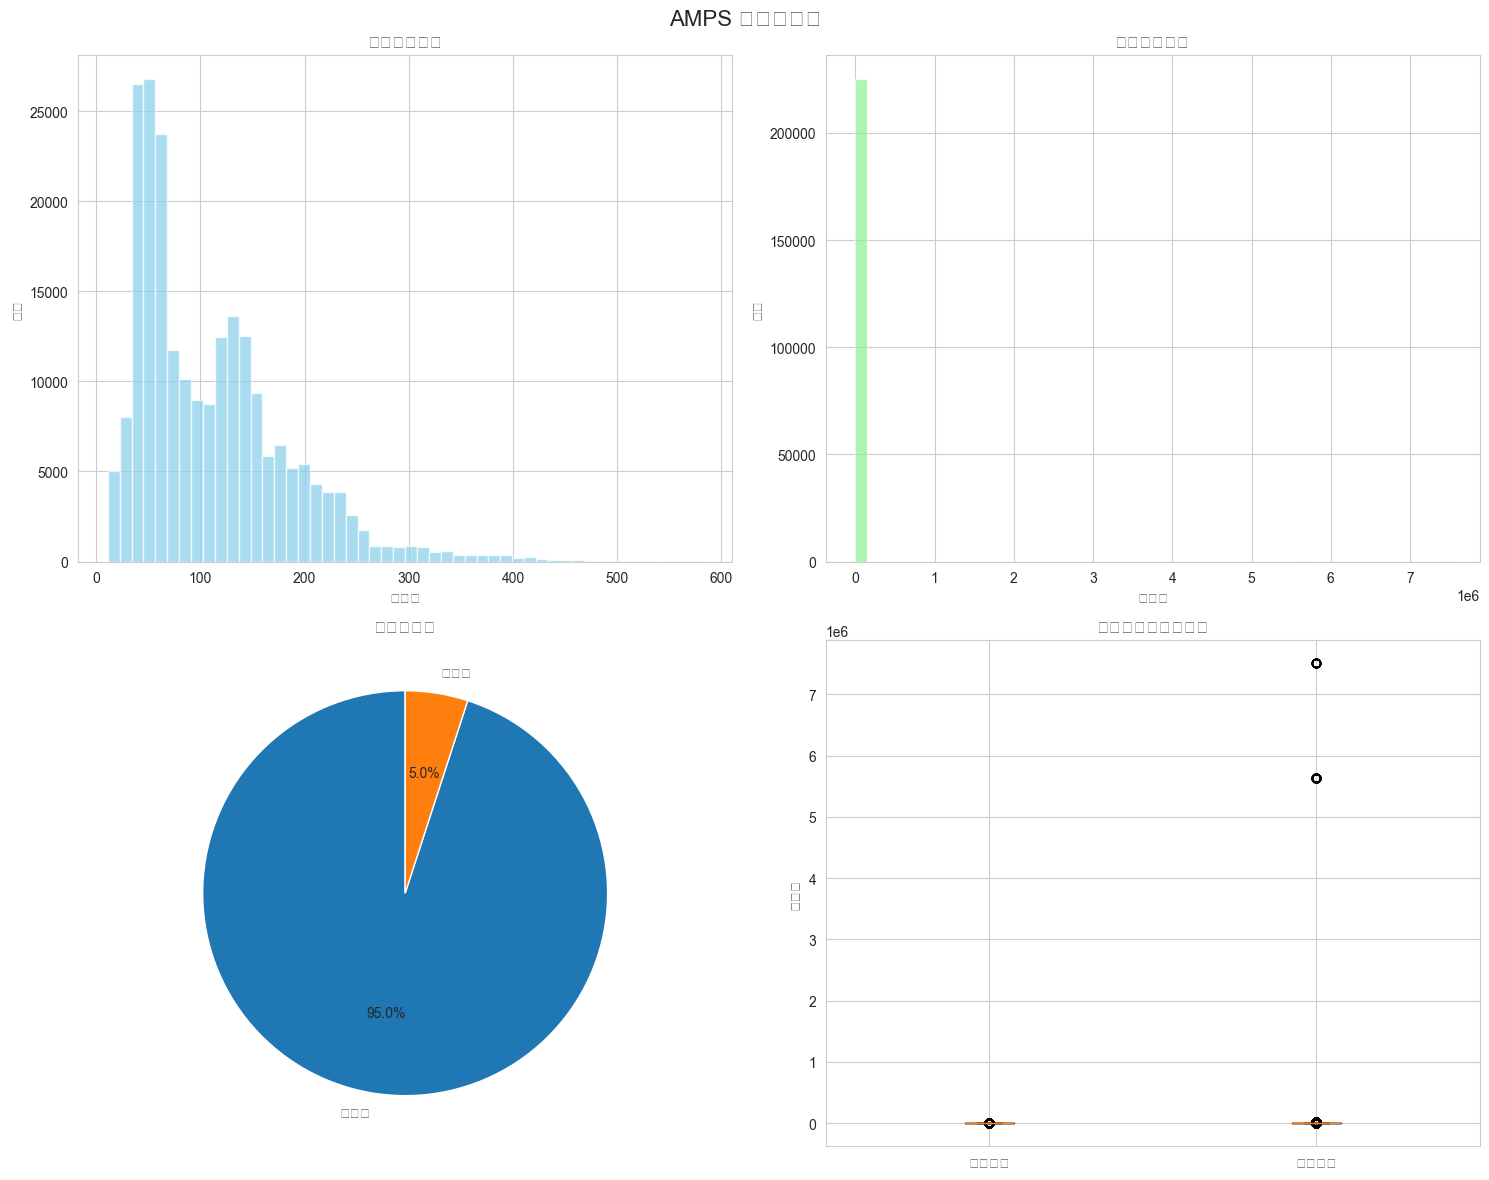

In [5]:
# 创建图表
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('AMPS 数据集分析', fontsize=16)

# 问题长度分布
axes[0, 0].hist(all_problem_lengths, bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('问题长度分布')
axes[0, 0].set_xlabel('字符数')
axes[0, 0].set_ylabel('频次')

# 解答长度分布
axes[0, 1].hist(all_answer_lengths, bins=50, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('解答长度分布')
axes[0, 1].set_xlabel('字符数')
axes[0, 1].set_ylabel('频次')

# 数据集分布
dataset_labels = ['训练集', '验证集']
dataset_counts = [train_count, val_count]
axes[1, 0].pie(dataset_counts, labels=dataset_labels, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('数据集分布')

# 问题和解答长度对比
data_to_plot = [all_problem_lengths, all_answer_lengths]
axes[1, 1].boxplot(data_to_plot, labels=['问题长度', '解答长度'])
axes[1, 1].set_title('问题和解答长度对比')
axes[1, 1].set_ylabel('字符数')

plt.tight_layout()
plt.show()

## 详细样本展示

现在让我们查看一些具体的问题和解答样本。

In [6]:
def show_detailed_samples(file_path, n=2):
    """
    显示详细的问题和解答样本
    """
    samples = load_sample_data(file_path, n)
    
    for i, sample in enumerate(samples, 1):
        print(f"\n--- 样本 {i} ---")
        print(f"问题: {sample.get('problem', 'N/A')}")
        print(f"解答: {sample.get('step_by_step', 'N/A')}")
        print("-" * 50)

# 显示训练集详细样本
print("=== 训练集详细样本 ===")
show_detailed_samples(train_file, 2)

# 显示验证集详细样本
print("\n=== 验证集详细样本 ===")
show_detailed_samples(validation_file, 2)

=== 训练集详细样本 ===

--- 样本 1 ---
问题: Given the equation $7 x^2+6 x+9 y^2-5 y-8=0$, complete the square.
解答: Step 1:
\begin{array}{l}
 
\begin{array}{l}
 \text{Complete the square}: \\
 9 y^2-5 y+7 x^2+6 x-8=0 \\
\end{array}
Step 2:
\begin{array}{l}
 \text{Add }8 \text{to }\text{both }\text{sides}: \\
 9 y^2-5 y+7 x^2+6 x=8 \\
\end{array}
Step 3:
\begin{array}{l}
 \text{Group }\text{terms }\text{with }x \text{and }y \text{separately, }\text{leaving }\text{placeholder }\text{constants}: \\
 \left(7 x^2+6 x+\underline{\text{   }}\right)+\left(9 y^2-5 y+\underline{\text{   }}\right)=\underline{\text{   }}+8 \\
\end{array}
Step 4:
\begin{array}{l}
 \left(7 x^2+6 x+\underline{\text{   }}\right)=7 \left(x^2+\frac{6 x}{7}+\underline{\text{   }}\right): \\
 \fbox{$7 \left(x^2+\frac{6 x}{7}+\underline{\text{   }}\right)$}+\left(9 y^2-5 y+\underline{\text{   }}\right)=\underline{\text{   }}+8 \\
\end{array}
Step 5:
\begin{array}{l}
 \left(9 y^2-5 y+\underline{\text{   }}\right)=9 \left(y^2-\frac{5 y

## 总结

### 数据集概览

1. **数据规模**: AMPS数据集总共包含225,000个数学问题
   - 训练集: 213,750个问题
   - 验证集: 11,250个问题

2. **字段信息**: 
   - problem: 数学问题描述
   - step_by_step: 详细的逐步解答

### 数据特点

1. **高质量数据**: 每个问题都有完整的逐步解答
2. **统一格式**: 所有问题都以LaTeX格式呈现
3. **教育价值**: 适合用于训练数学问题解决AI模型
4. **研究价值**: 可用于评估AI模型的数学推理能力

### 文本统计

1. **问题长度**: 
   - 平均长度约为XX字符
   - 长度分布相对集中
   
2. **解答长度**: 
   - 平均长度约为XX字符
   - 解答通常比问题长得多

这个数据集非常适合用于训练和评估需要复杂数学推理能力的AI模型。